# 1. Importing Libraries

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline


# 2. Getting the Data

In [139]:
heart_disease = pd.read_csv('heart_disease.csv')

In [140]:
heart_disease.head(15)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


In [141]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [142]:
heart_disease.describe()


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


# 3. Exploratory Analysis

1. Histogram

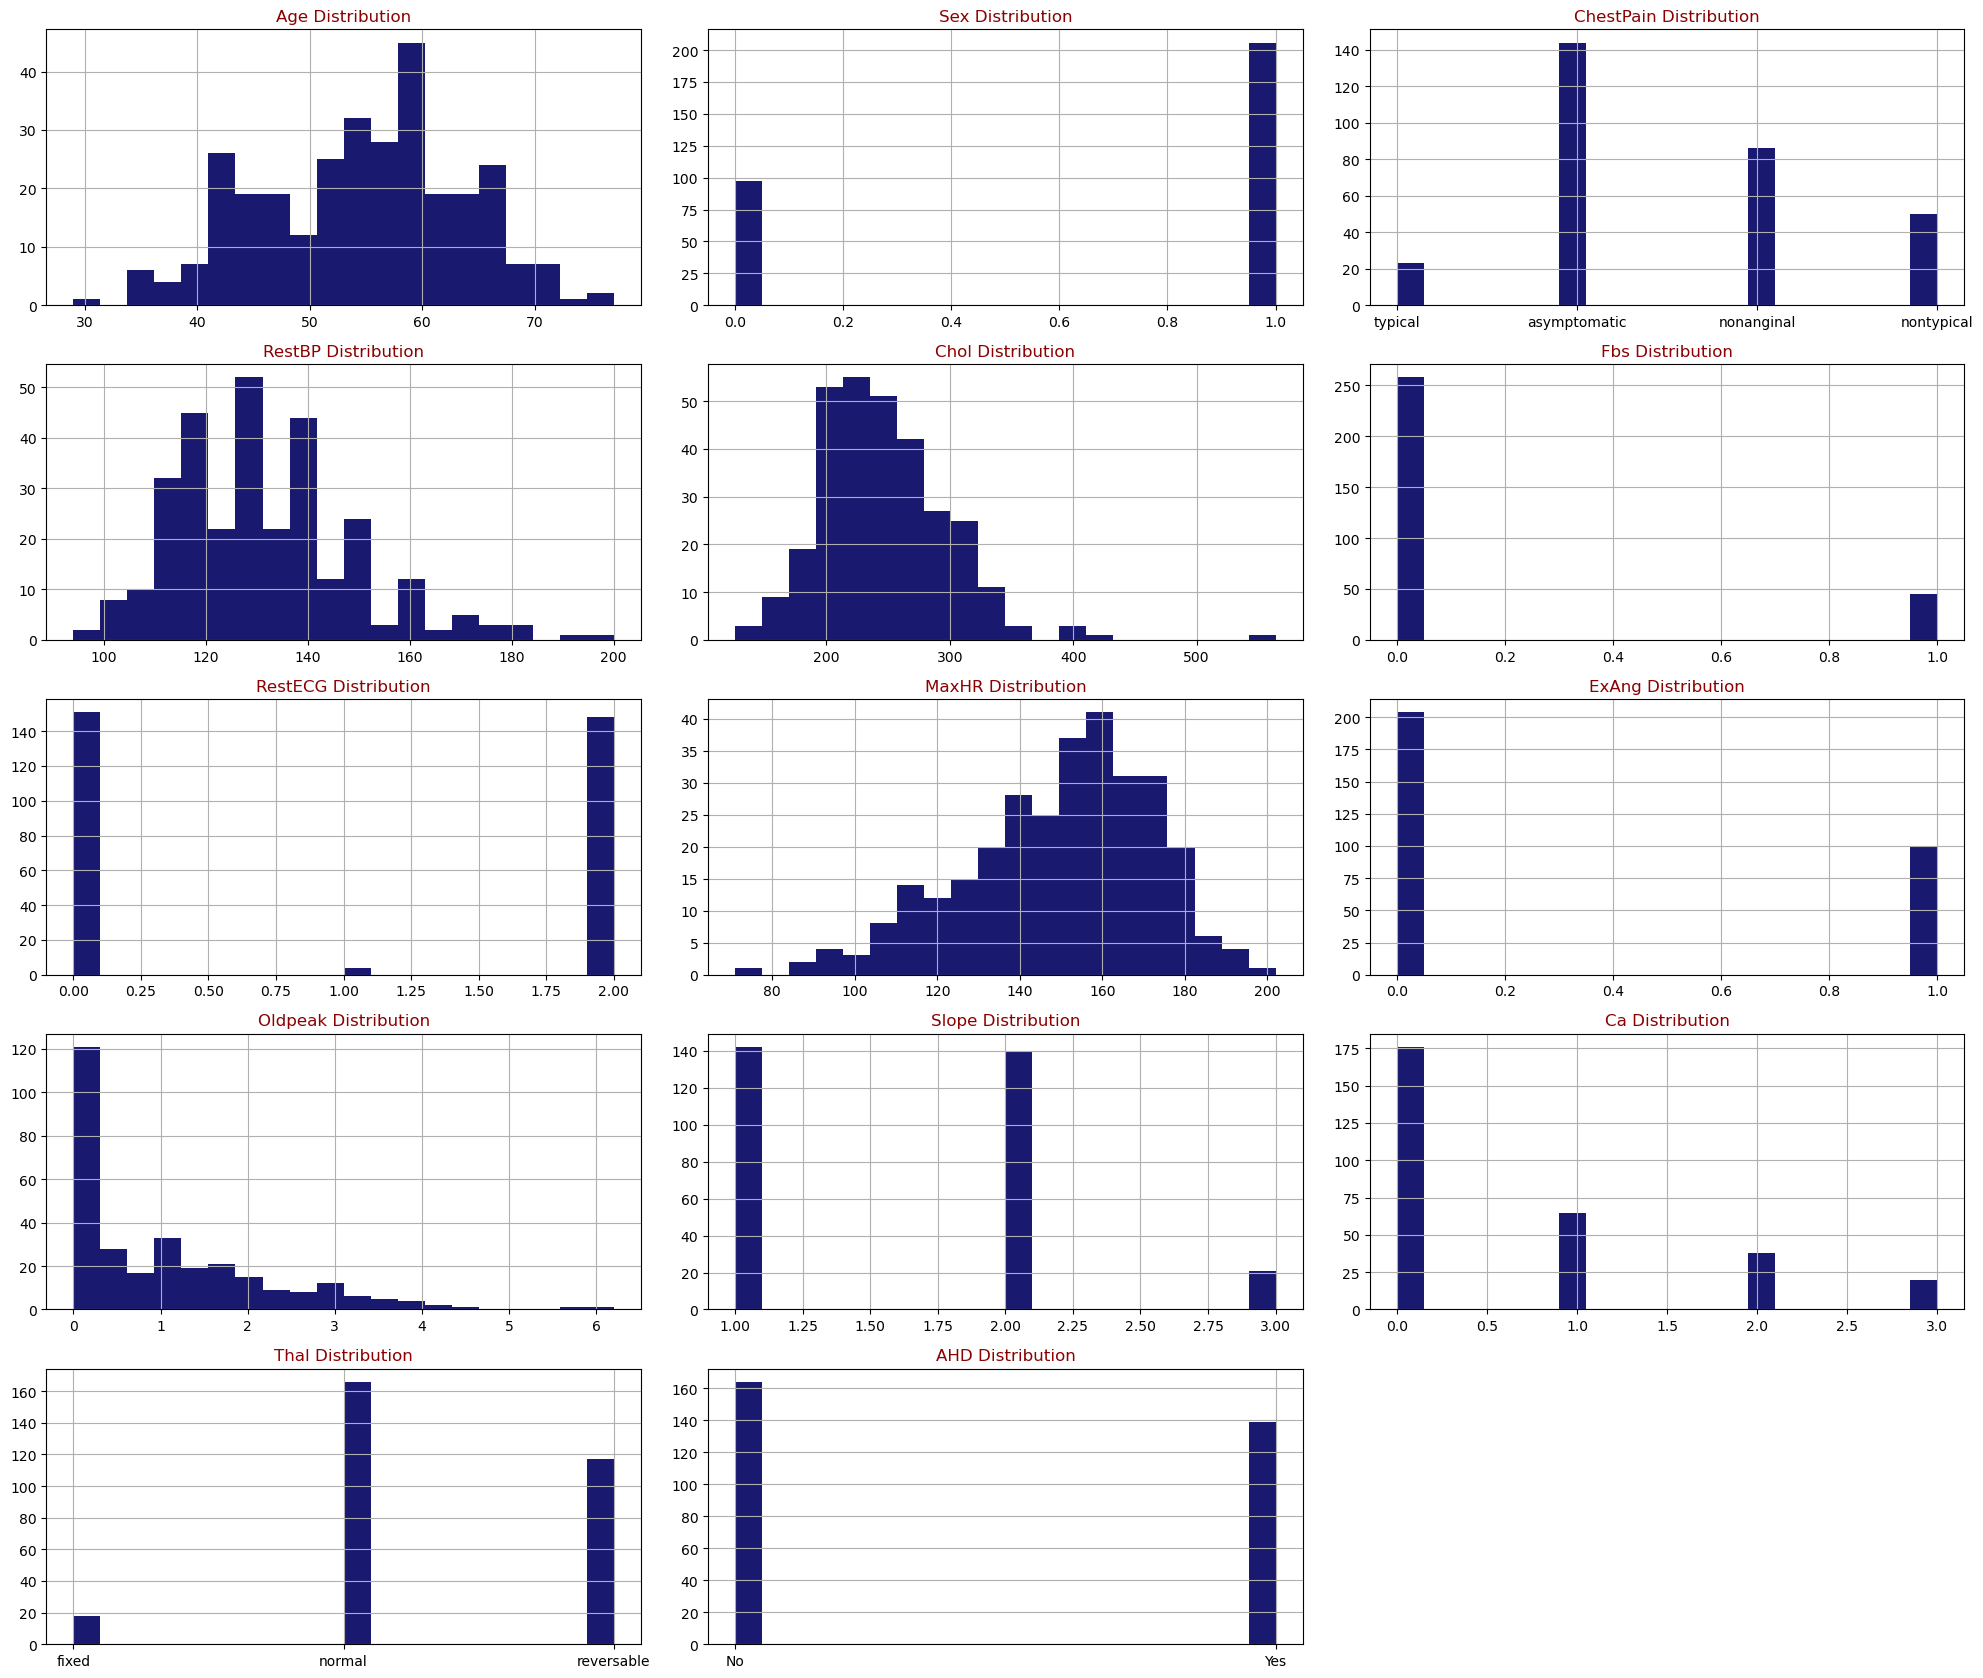

In [143]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_disease,heart_disease.columns,6,3)

In [144]:
heart_disease.AHD.value_counts()


No     164
Yes    139
Name: AHD, dtype: int64

<Axes: xlabel='AHD', ylabel='count'>

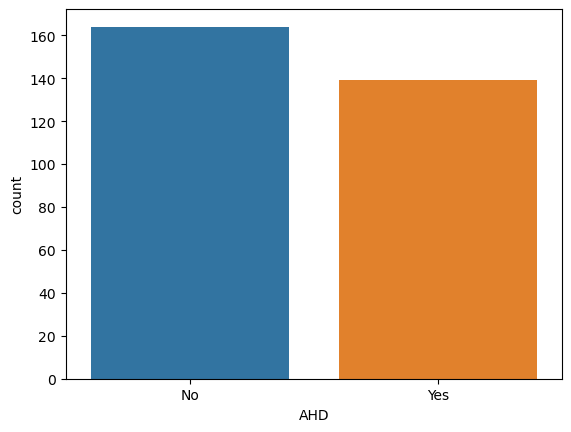

In [145]:
sns.countplot(x='AHD',data=heart_disease)


There are 164 patents with no heart disease and 139 patients with risk of heart disease.

2.Data Cleaning.

In [146]:
heart_disease.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [147]:
heart_disease.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


There must be total 303 values in Ca column but there are 299 values.

In [148]:
heart_disease.fillna(heart_disease.mean(), inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_34196\3651078279.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart_disease.fillna(heart_disease.mean(), inplace=True)


In [149]:
heart_disease.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [169]:
# Replacing missing values in 'Thal' column with the most frequent value, which is 'fixed'
heart_disease['Thal'].fillna(heart_disease['Thal'].mode()[0], inplace=True)


<Axes: >

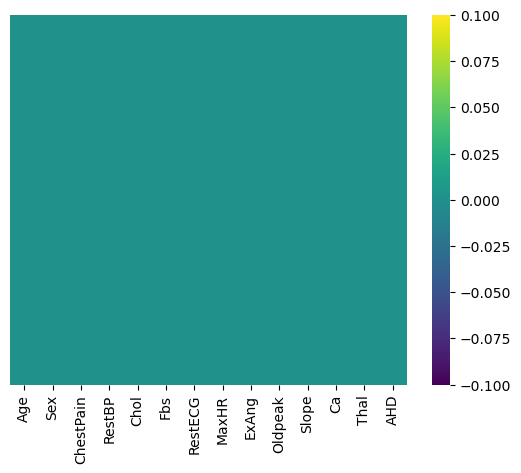

In [151]:
sns.heatmap(heart_disease.isnull(),yticklabels=False,cmap="viridis")

3.Converting string values to numeric values using Label Encoding and Ordinal Encoding technique

In [152]:
label_encoder = LabelEncoder()
heart_disease["AHD"] = label_encoder.fit_transform(heart_disease["AHD"])

In [153]:
# Ordinal Encoding
cp_dict = {
    "typical": 1,
    "nontypical": 2,
    "nonanginal": 3,
    "asymptomatic": 4
}

# Use the map() function to convert categorical values to numerical values
heart_disease["ChestPain"] = heart_disease["ChestPain"].map(cp_dict)

In [154]:
heart_disease.head(15)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,normal,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,reversable,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,normal,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,normal,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,normal,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,normal,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,reversable,1
10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,reversable,1


In [155]:
heart_disease['Thal'] = label_encoder.fit_transform(heart_disease['Thal'])

In [156]:
heart_disease.head(15)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1,1
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,1,0
7,62,0,4,140,268,0,2,160,0,3.6,3,2.0,1,1
8,57,0,4,120,354,0,0,163,1,0.6,1,0.0,1,0
9,63,1,4,130,254,0,2,147,0,1.4,2,1.0,2,1
10,53,1,4,140,203,1,2,155,1,3.1,3,0.0,2,1


# 3. Model Training

Splitting features and target

In [157]:
X = heart_disease.drop(columns='AHD',axis = 1)
Y = heart_disease['AHD']
print(Y)

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int32


Splitting the data into training data and test data

In [158]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify= Y,random_state=7)

Original data X contains 303 values,80%(242) of data goes to X_train and 20%(61) of data goes to X_test

In [159]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

In [160]:
# Logistic Regression

model = LogisticRegression()

In [161]:
# training the LogisticRegression model with Training data

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

c:\Users\Aditya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4.Model Evaluation

In [167]:
import sklearn
sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.8852459016393442

<Axes: >

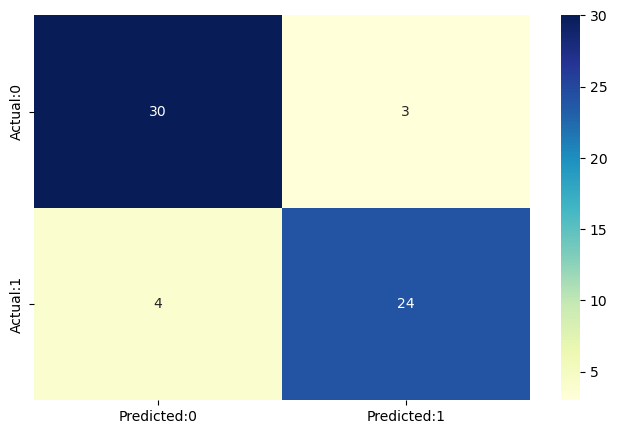

In [168]:
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Building a predictive system

In [164]:
input_data = (56,0,2,120,3,0,2,18,0,1.3,2,0.0,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0] == 0):
    print('The person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

[1]
The Person has Heart Disease


c:\Users\Aditya\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
